# Data Preprocessing

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime

#Importing the Datasets

In [2]:
dataset_training = pd.read_csv('bitcoin_price_Training.csv')
# dataset_test = pd.read_csv('bitcoin_price_Test.csv')

dataset_training['Date'] = pd.to_datetime(dataset_training['Date'])
data = dataset_training.set_index('Date')

data_open = data[['Open']]
# inserting new column with yesterday's consumption values
data_open.loc[:,'Yesterday'] = data_open.loc[:,'Open'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_open.loc[:,'Yesterday_Diff'] = data_open.loc[:,'Yesterday'].diff()
# dropping NAs
data_open = data_open.dropna()


               Open  Yesterday  Yesterday_Diff
Date                                          
2017-08-04   566.33     578.28            3.25
2017-08-03   548.66     566.33          -11.95
2017-08-02   606.40     548.66          -17.67
2017-08-01   624.60     606.40           57.74
2017-07-31  2763.24     624.60           18.20
...             ...        ...             ...
2013-05-02   116.38     106.25            8.15
2013-05-01   139.00     116.38           10.13
2013-04-30   144.00     139.00           22.62
2013-04-29   134.44     144.00            5.00
2013-04-28   135.30     134.44           -9.56

[1560 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


## Regression metrics

In [3]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [4]:
X_train = data_open[:'2016'].drop(['Open'], axis = 1)
y_train = data_open.loc[:'2016', 'Open']
X_test = data_open['2017'].drop(['Open'], axis = 1)
y_test = data_open.loc['2017', 'Open']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Training different types of regression algorithms

## Linear Regressions

### Ridge regression

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=10,random_state=0)
reg.fit(X_train,y_train)

# explained_variance:  0.9853
# mean_squared_log_error:  0.0019
# r2:  0.9853
# MAE:  51.6452
# MSE:  6802.4182
# RMSE:  82.4768

### LARS Lasso

In [ ]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1, normalize=False,random_state=0)
reg.fit(X_train,y_train)

# explained_variance:  0.9853
# mean_squared_log_error:  0.0019
# r2:  0.9853
# MAE:  51.6452
# MSE:  6802.4182
# RMSE:  82.4768

LassoLars(alpha=0.1, normalize=False, random_state=0)

### Baesian Regression

In [ ]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)

# explained_variance:  0.9423
# mean_squared_log_error:  0.0122
# r2:  0.9421
# MAE:  60.7912
# MSE:  27853.2625
# RMSE:  166.893

BayesianRidge()

### Generalized Linear Regression

In [ ]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor()
reg.fit(X_train,y_train)

# explained_variance:  0.9423
# mean_squared_log_error:  0.0122
# r2:  0.9421
# MAE:  60.792
# MSE:  27853.2559
# RMSE:  166.8929

TweedieRegressor()

### Quantile Regressor

In [ ]:
from sklearn.linear_model import QuantileRegressor
reg = QuantileRegressor(quantile=0.8)
reg.fit(X_train,y_train)

# explained_variance:  0.9402
# mean_squared_log_error:  0.0124
# r2:  0.9383
# MAE:  75.5046
# MSE:  29669.645
# RMSE:  172.2488

QuantileRegressor(quantile=0.8)

## Kernel Ridge Regression

In [ ]:
from sklearn.kernel_ridge import KernelRidge
reg = KernelRidge(alpha=1.0)
reg.fit(X_train,y_train)

# explained_variance:  0.9421
# mean_squared_log_error:  0.0122
# r2:  0.942
# MAE:  61.5111
# MSE:  27889.9999
# RMSE:  167.003

KernelRidge(alpha=1.0)

## SVM Regression

In [12]:
from sklearn import svm
reg = svm.SVR(C=10, epsilon=0.1, gamma=1e-07, kernel='linear')
# reg = svm.SVR()
reg.fit(X_train,y_train)

# explained_variance:  0.9415
# mean_squared_log_error:  0.0121
# r2:  0.9415
# MAE:  62.8916
# MSE:  28147.5131
# RMSE:  167.7722

# explained_variance:  -0.1065
# mean_squared_log_error:  1.7702
# r2:  -2.9554
# MAE:  1170.6019
# MSE:  1902520.6998
# RMSE:  1379.3189

SVR()

## Stochastic Gradient Descent Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train,y_train)

# explained_variance:  0.9423
# mean_squared_log_error:  0.0121
# r2:  0.9421
# MAE:  60.8137
# MSE:  27841.7084
# RMSE:  166.8583

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

## KNeighborsRegressor

In [14]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X_train,y_train)

# explained_variance:  0.1373
# mean_squared_log_error:  0.2756
# r2:  -0.5916
# MAE:  596.2553
# MSE:  765555.8131
# RMSE:  874.9605

KNeighborsRegressor(n_neighbors=2)

## GaussianProcessRegressor

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
reg = GaussianProcessRegressor(kernel=kernel, random_state=0)
reg.fit(X_train,y_train)

# explained_variance:  0.9422
# mean_squared_log_error:  0.0121
# r2:  0.9421
# MAE:  61.1569
# MSE:  27866.069
# RMSE:  166.9313

GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         random_state=0)

## PLSRegression

In [ ]:
from sklearn.cross_decomposition import PLSRegression
reg = PLSRegression(n_components=2)
reg.fit(X_train,y_train)

# explained_variance:  0.9423
# mean_squared_log_error:  0.0122
# r2:  0.9421
# MAE:  60.7948
# MSE:  27853.2362
# RMSE:  166.8929

PLSRegression()

## DecisionTreeRegressor

In [16]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(X_train,y_train)

# explained_variance:  0.1481
# mean_squared_log_error:  0.2725
# r2:  -0.5791
# MAE:  595.6048
# MSE:  759522.1504
# RMSE:  871.5057

DecisionTreeRegressor()

In [8]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(random_state=1, max_iter=500)
reg.fit(X_train,y_train)

# explained_variance:  0.9415
# mean_squared_log_error:  0.0122
# r2:  0.9414
# MAE:  62.0192
# MSE:  28170.3172
# RMSE:  167.8402

MLPRegressor(max_iter=500, random_state=1)

# Optimizing parameters

In [20]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
  predict = np.array(predict)
  actual = np.array(actual)
  distance = predict - actual
  square_distance = distance ** 2
  mean_square_distance = square_distance.mean()
  score = np.sqrt(mean_square_distance)
  return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [21]:
from sklearn.model_selection import GridSearchCV

# param_search = { 
#     'n_estimators': [20, 50, 100],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [i for i in range(5,15)]
# }
# SVR Params
param_svr = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
param_tree={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


grid_search = GridSearchCV(estimator = reg,
                           param_grid = param_tree,
                           scoring = rmse_score,
                           cv = 5)
grid_search.fit(X_train, y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_score*100))
print("Best Parameters:", best_parameters)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fra

Best Accuracy: -9233.82 %
Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [-146.06531709 -158.78218898 -144.64621846 ...           nan           nan
           nan]
  category=UserWarning,


# Visualizeing Results

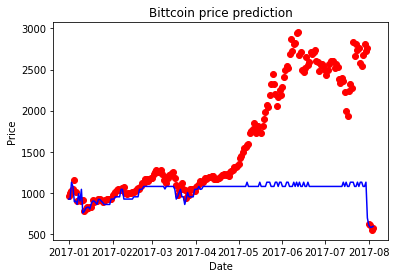

In [17]:
# plt.scatter(X_train.index, y_train, color = 'red')
# plt.plot(X_train.index, reg.predict(X_train), color = 'blue')
plt.scatter(X_test.index, y_test, color = 'red')
plt.plot(X_test.index, reg.predict(X_test), color = 'blue')
plt.title('Bittcoin price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Printing the regression results

In [18]:
y_true = y_test.values
y_pred = reg.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.1515
mean_squared_log_error:  0.2602
r2:  -0.5367
MAE:  580.2776
MSE:  739121.6615
RMSE:  859.7219
